In [1]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
h2o.init(max_mem_size = 2)           
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-2~deb9u1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /opt/conda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy5rqj7oo
  JVM stdout: /tmp/tmpy5rqj7oo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy5rqj7oo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_unknownUser_3wfuck
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
higgs_train = h2o.import_file('../input/training/training.csv')
higgs_test = h2o.import_file('../input/test/test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
higgs_train.describe()

Rows:250000
Cols:33




,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,enum
mins,100000.0,-999.0,0.0,6.329,0.0,-999.0,-999.0,-999.0,0.208,0.0,46.104,0.047,-1.414,-999.0,20.0,-2.499,-3.142,26.0,-2.505,-3.142,0.109,-3.142,13.678,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.00150187015894,
mean,224999.5,-49.02307943999997,49.23981927600006,81.18198161200002,57.895961656000004,-708.4206754000005,-601.2370507319996,-709.3566028999993,2.3730998440000004,18.917332443999992,158.432217048,1.437609432000002,-0.12830470800000007,-708.9851891319996,38.70741912799999,-0.010973047999999978,-0.008171071999999982,46.66020724800002,-0.019507468000000052,0.04354296400000001,41.71723452399993,-0.010119191999999997,209.79717763200009,0.9791759999999993,-348.32956718800017,-399.25431389199974,-399.25978800799993,-692.3812035479996,-709.1216091639996,-709.118631135999,73.06459138399991,1.6467673437182964,
maxs,349999.0,1192.026,690.075,1349.351,2834.999,8.503,4974.979,16.69,5.684,2834.999,1852.462,19.773,1.414,1.0,764.408,2.497,3.142,560.271,2.503,3.142,2842.617,3.142,2003.976,3.0,1120.573,4.499,3.141,721.456,4.5,3.142,1633.433,7.82254254503,
sigma,72168.92798612619,406.3456467028014,35.344885611871874,40.82869053241533,63.655681618336295,454.4805651106833,657.9723021131682,453.01987655208734,0.7829111186453127,22.273493751956487,115.70611513348777,0.8447429446613964,1.1935848357750178,453.5967212021903,22.412080666702142,1.2140786460280995,1.8167630443748604,22.0649224049562,1.2649821484873096,1.81661126281547,32.89469319196888,1.81222270198719,126.49950571643991,0.9774263053922423,532.9627893583422,489.3382860179392,489.3338833209041,479.87549584539084,453.3846240477962,453.3890172736703,98.01566200825654,1.8751033154986634,
zeros,0,0,3,0,41,6,0,58,0,39,0,0,53,15752,0,0,32,0,35,33,0,44,0,99913,0,26,19,0,9,10,99913,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,100000.0,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
1,100001.0,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b
2,100002.0,-999.0,162.172,125.953,35.635,-999.0,-999.0,-999.0,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251,2.34738894364,b


In [5]:
higgs_test.describe()

Rows:550000
Cols:31




,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real
mins,350000.0,-999.0,0.0,6.81,0.0,-999.0,-999.0,-999.0,0.237,0.0,46.103,0.055,-1.414,-999.0,20.0,-2.499,-3.142,26.0,-2.508,-3.142,0.051,-3.142,13.847,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
mean,624999.5,-48.95014380545456,49.26109327454554,81.12390393272712,57.824800905454595,-707.4488780127281,-599.7059046600003,-708.3914245781832,2.3740761200000073,18.988276967272757,158.65974856727323,1.4394145763636355,-0.12694181090909115,-708.0157559854533,38.69683138363645,-0.011861305454545456,-0.015815007272727295,46.71406235454543,-0.018781052727272717,0.05179733454545454,41.62723119818186,-0.008214360000000014,209.93369488545483,0.9801709090909093,-348.9466840672726,-399.88383894545416,-399.89623447454505,-691.3092768418176,-708.1506051490906,-708.1530578727264,73.24885610545459
maxs,899999.0,1949.261,968.669,1264.965,1337.187,8.724,4794.827,17.294,5.751,759.363,2079.162,32.228,1.414,1.0,627.023,2.5,3.142,701.328,2.506,3.142,1254.363,3.142,2190.275,3.0,1163.439,4.5,3.142,817.801,4.5,3.142,1860.175
sigma,158771.46836464878,406.2336857047821,35.42542224835444,40.435559635053025,63.29131449614005,454.92879097639536,659.1295886324864,453.4612217477622,0.7798945077457625,21.767376446147207,116.23758884551266,0.8450259764113148,1.1945034107323074,454.04333031014244,22.42160253515038,1.2133437634189332,1.816022751318418,22.174519358031276,1.2641465666647782,1.8140551884848883,32.32445724907341,1.8127767586906602,126.91007907106807,0.9792712530770781,533.1551761813583,489.4677863470162,489.45774746013177,480.4352298428811,453.834190219432,453.83009510274985,98.46713409189762
zeros,0,0,6,0,78,29,0,125,0,78,0,0,114,34624,0,0,79,0,83,81,0,89,0,220156,0,64,57,0,38,24,220156
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,350000.0,-999.0,79.589,23.916,3.036,-999.0,-999.0,-999.0,0.903,3.036,56.018,1.536,-1.404,-999.0,22.088,-0.54,-0.609,33.93,-0.504,-1.511,48.509,2.022,98.556,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
1,350001.0,106.398,67.49,87.949,49.994,-999.0,-999.0,-999.0,2.048,2.679,132.865,1.777,-1.204,-999.0,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1.0,47.575,-0.553,-0.849,-999.0,-999.0,-999.0,47.575
2,350002.0,117.794,56.226,96.358,4.137,-999.0,-999.0,-999.0,2.755,4.137,97.6,1.096,-1.408,-999.0,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


In [6]:
train, valid, test = higgs_train.split_frame([0.6, 0.2], seed = 2019)
higgs_X = higgs_train.col_names[1: -1]
higgs_y = higgs_train.col_names[-1]

In [7]:
higgs_model_v1 = H2ODeepLearningEstimator(model_id = 'higgs_v1', epochs = 1, variable_importances = True)
higgs_model_v1.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)
print(higgs_model_v1)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  higgs_v1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.026073050390430556
RMSE: 0.1614715157246954
LogLoss: 0.09243322602509785
Mean Per-Class Error: 0.030716778174706416
AUC: 0.9935350452752101
pr_auc: 0.9659089004108511
Gini: 0.9870700905504202
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33502486084829775: 


,b,s,Error,Rate
b,6296.0,218.0,0.0335,(218.0/6514.0)
s,99.0,3330.0,0.0289,(99.0/3429.0)
Total,6395.0,3548.0,0.0319,(317.0/9943.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3350249,0.9545650,276.0
max f2,0.0924018,0.9725479,347.0
max f0point5,0.7043658,0.9529605,176.0
max accuracy,0.3538860,0.9681183,271.0
max precision,0.9996306,1.0,0.0
max recall,0.0000040,1.0,399.0
max specificity,0.9996306,1.0,0.0
max absolute_mcc,0.3350249,0.9303406,276.0
max min_per_class_accuracy,0.3575704,0.9677617,270.0
max mean_per_class_accuracy,0.2162471,0.9692832,307.0


Gains/Lift Table: Avg response rate: 34.49 %, avg score: 33.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100573,0.9994712,2.8996792,2.8996792,1.0,0.9995903,1.0,0.9995903,0.0291630,0.0291630,189.9679207,189.9679207
,2,0.0200141,0.9993088,2.8996792,2.8996792,1.0,0.9993901,1.0,0.9994907,0.0288714,0.0580344,189.9679207,189.9679207
,3,0.0300714,0.9990952,2.8996792,2.8996792,1.0,0.9992160,1.0,0.9993988,0.0291630,0.0871974,189.9679207,189.9679207
,4,0.0400282,0.9988597,2.8996792,2.8996792,1.0,0.9989710,1.0,0.9992924,0.0288714,0.1160688,189.9679207,189.9679207
,5,0.0500855,0.9985257,2.8996792,2.8996792,1.0,0.9986853,1.0,0.9991705,0.0291630,0.1452318,189.9679207,189.9679207
,6,0.1000704,0.9959706,2.8705074,2.8851080,0.9899396,0.9974072,0.9949749,0.9982898,0.1434821,0.2887139,187.0507384,188.5107954
,7,0.1500553,0.9911912,2.8705074,2.8802444,0.9899396,0.9938627,0.9932976,0.9968151,0.1434821,0.4321960,187.0507384,188.0244360
,8,0.2000402,0.9809428,2.8413356,2.8705221,0.9798793,0.9868558,0.9899447,0.9943265,0.1420239,0.5742199,184.1335561,187.0522050
,9,0.3000101,0.8693353,2.7304826,2.8238579,0.9416499,0.9459859,0.9738518,0.9782184,0.2729659,0.8471858,173.0482633,182.3857893
,10,0.3999799,0.0143778,1.5023489,2.4935637,0.5181087,0.4260777,0.8599447,0.8402179,0.1501896,0.9973753,50.2348885,149.3563713




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.026983463494991273
RMSE: 0.16426644056225018
LogLoss: 0.09393055248504079
Mean Per-Class Error: 0.03167270176204773
AUC: 0.9935482160396819
pr_auc: 0.9394616467994488
Gini: 0.9870964320793638
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2672547145964945: 


,b,s,Error,Rate
b,31600.0,1284.0,0.039,(1284.0/32884.0)
s,428.0,16607.0,0.0251,(428.0/17035.0)
Total,32028.0,17891.0,0.0343,(1712.0/49919.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2672547,0.9509821,298.0
max f2,0.0661181,0.9713127,360.0
max f0point5,0.7193755,0.9504917,166.0
max accuracy,0.3104994,0.9657445,285.0
max precision,0.9974057,0.9960730,6.0
max recall,0.0000019,1.0,399.0
max specificity,0.9995351,0.9998784,0.0
max absolute_mcc,0.2672547,0.9252895,298.0
max min_per_class_accuracy,0.3599689,0.9656368,271.0
max mean_per_class_accuracy,0.2077618,0.9683273,314.0


Gains/Lift Table: Avg response rate: 34.13 %, avg score: 33.33 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100162,0.9995069,2.9186571,2.9186571,0.996,0.9996077,0.996,0.9996077,0.0292339,0.0292339,191.8657118,191.8657118
,2,0.0200124,0.9993464,2.9127611,2.9157121,0.9939880,0.9994256,0.9949950,0.9995167,0.0291165,0.0583505,191.2761125,191.5712073
,3,0.0300086,0.9991573,2.9186336,2.9166853,0.9959920,0.9992537,0.9953271,0.9994291,0.0291752,0.0875257,191.8633628,191.6685274
,4,0.0400048,0.9989329,2.9127611,2.9157047,0.9939880,0.9990448,0.9949925,0.9993331,0.0291165,0.1166422,191.2761125,191.5704728
,5,0.0500010,0.9986417,2.9186336,2.9162903,0.9959920,0.9987960,0.9951923,0.9992257,0.0291752,0.1458174,191.8633628,191.6290273
,6,0.1000020,0.9963053,2.9174643,2.9168773,0.9955929,0.9976350,0.9953926,0.9984304,0.1458761,0.2916936,191.7464303,191.6877288
,7,0.1500030,0.9912811,2.8998539,2.9112028,0.9895833,0.9940837,0.9934562,0.9969815,0.1449956,0.4366892,189.9853855,191.1202811
,8,0.2000040,0.9806239,2.8775473,2.9027889,0.9819712,0.9867037,0.9905849,0.9944120,0.1438802,0.5805694,187.7547287,190.2788930
,9,0.3000060,0.8529223,2.7407728,2.8487836,0.9352965,0.9411122,0.9721554,0.9766454,0.2740828,0.8546522,174.0772803,184.8783554
,10,0.4000080,0.0090212,1.4381866,2.4961343,0.4907853,0.4020621,0.8518129,0.8329996,0.1438215,0.9984737,43.8186628,149.6134323



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-03-04 08:57:47,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-03-04 08:57:52,8.612 sec,3159 obs/sec,0.1006090,1,15115.0,0.2148575,0.1775437,0.7956754,0.9893354,0.8501174,2.8416856,0.0434477,0.2126983,0.1727015,0.7987513,0.9902434,0.8057871,2.9127964,0.0442116
,2019-03-04 08:58:18,33.637 sec,5877 obs/sec,1.0984125,11,165020.0,0.1614715,0.0924332,0.8845985,0.9935350,0.9659089,2.8996792,0.0318817,0.1642664,0.0939306,0.8799664,0.9935482,0.9394616,2.9186571,0.0342956


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Weight,1.0,1.0,0.1316546
DER_mass_vis,0.3533085,0.3533085,0.0465147
DER_mass_MMC,0.2574570,0.2574570,0.0338954
PRI_jet_leading_pt,0.2528853,0.2528853,0.0332935
PRI_jet_leading_eta,0.2492421,0.2492421,0.0328139
---,---,---,---
PRI_lep_eta,0.1895724,0.1895724,0.0249581
PRI_tau_phi,0.1706039,0.1706039,0.0224608
PRI_tau_eta,0.1646888,0.1646888,0.0216820
PRI_lep_phi,0.1551754,0.1551754,0.0204296



See the whole table with table.as_data_frame()



In [8]:
var_df = pd.DataFrame(higgs_model_v1.varimp(), columns = ['Variable', 'Relative Importance', 'Scaled Importance', 'Percentage'])
var_df.head(10)

,Variable,Relative Importance,Scaled Importance,Percentage
0,Weight,1.000000,1.000000,0.131655
1,DER_mass_vis,0.353308,0.353308,0.046515
2,DER_mass_MMC,0.257457,0.257457,0.033895
3,PRI_jet_leading_pt,0.252885,0.252885,0.033293
4,PRI_jet_leading_eta,0.249242,0.249242,0.032814
5,PRI_jet_leading_phi,0.242450,0.242450,0.031920
6,DER_deltar_tau_lep,0.241886,0.241886,0.031845
7,DER_sum_pt,0.236687,0.236687,0.031161
8,DER_deltaeta_jet_jet,0.233596,0.233596,0.030754
9,PRI_jet_subleading_phi,0.232622,0.232622,0.030626


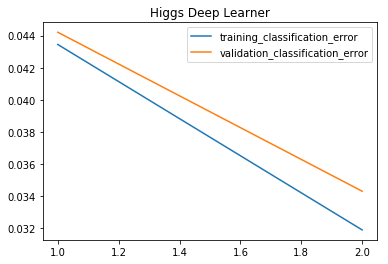

In [9]:
higgs_v1_df = higgs_model_v1.score_history()
plt.plot(higgs_v1_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs_v1_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner")
plt.legend();

In [10]:
pred = higgs_model_v1.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |███████████████████████████████████████| 100%


0.9668779841913092

In [11]:
higgs_model_v2 = H2ODeepLearningEstimator(model_id = 'higgs_v2', hidden = [32, 32, 32], 
                                          epochs = 1000000, score_validation_samples = 10000, 
                                          stopping_rounds = 2, stopping_metric = 'misclassification', 
stopping_tolerance = 0.01)
higgs_model_v2.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


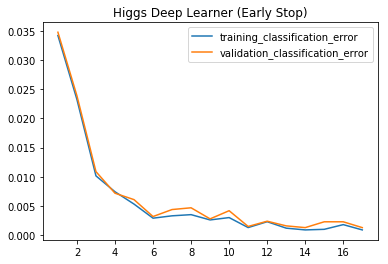

In [12]:
higgs_v2_df = higgs_model_v2.score_history()
plt.plot(higgs_v2_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs_v2_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner (Early Stop)")
plt.legend();

In [13]:
pred = higgs_model_v2.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |███████████████████████████████████████| 100%


0.9986959836295791

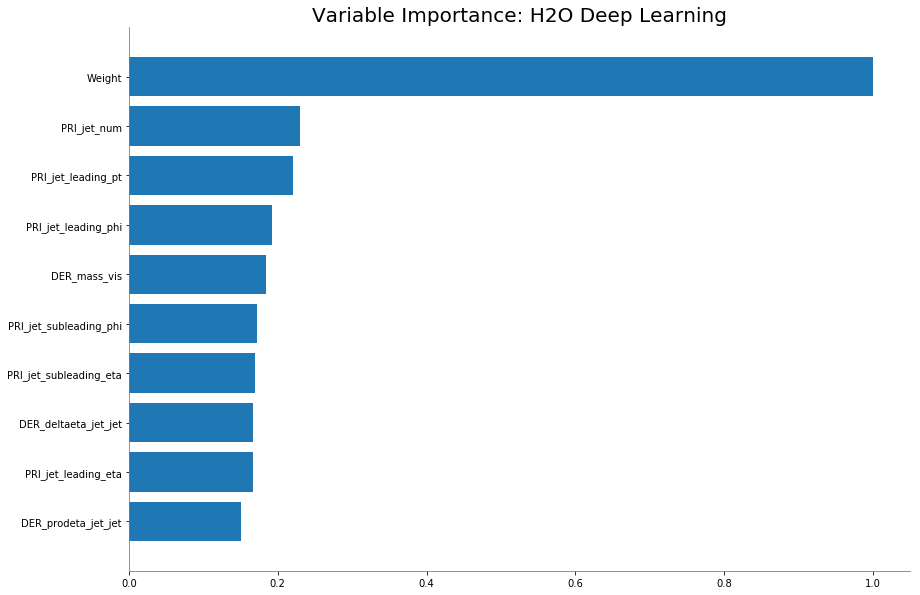

In [14]:
higgs_model_v2.varimp_plot();

In [15]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)
aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
XRT_1_AutoML_20190304_090000,1,0.0110086,0,0.0397093,0.00157683
StackedEnsemble_AllModels_AutoML_20190304_090000,1,0.000344357,0,0.00192309,3.69828e-06
StackedEnsemble_BestOfFamily_AutoML_20190304_090000,1,0.000344357,0,0.00192309,3.69828e-06
DRF_1_AutoML_20190304_090000,1,0.0138703,1.47664e-05,0.0458373,0.00210105
GLM_grid_1_AutoML_20190304_090000_model_1,0.994749,0.0932277,0.0283046,0.159485,0.0254355
